In [ ]:
# import all libraries first

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline




The first step is to read import data files. we also transpose the data and drop the unneccesary data labels

In [2]:
# loading dataset into Pandas DataFrame
df = pd.read_csv("COG labels 66 samples unscaled .csv")

#                 , names=['Protein'+str(i) for i in range(0,3139)])
number_of_rows = (len(df.index))
df_transposed = df.T
df_transposed.columns = ['Protein'+str(i) for i in range(0,number_of_rows)]

#lets trim the first 39 columns as its all text descriptions about the data
df_trimmed = df_transposed.drop(df_transposed.index[0:38])

#lets replace any #na values with a 0 to avoid errors later
df_trimmed.fillna('0',inplace=True)

#label up the columns
features = ['Protein'+str(i) for i in range(0,number_of_rows)]
x = df_trimmed.loc[:, features].values

#scale the data
#x = x.T
#x = StandardScaler().fit_transform(x)
#x = x.T

indexNamesArr = df_trimmed.index.values
listOfRowIndexLabels = list(indexNamesArr)

scaled = pd.DataFrame(data = x, columns = features, index = listOfRowIndexLabels)
#scaled.to_csv("how scaling works.csv")
scaled.head()
       

,Protein0,Protein1,Protein2,Protein3,Protein4,Protein5,Protein6,Protein7,Protein8,Protein9,...,Protein4039,Protein4040,Protein4041,Protein4042,Protein4043,Protein4044,Protein4045,Protein4046,Protein4047,Protein4048
1A,985.383,0,0,98.7523,424.448,6789.48,10177,2741.73,7106.33,6815.99,...,0,0,0,0,0,0,0,0,0,0
1B,962.58,0,0,110.239,410.523,6914.31,10192.6,2206.59,7127.49,7323.25,...,0,0,0,0,0,0,0,0,0,0
1C,1065.57,0,0,102.141,416.635,7012.07,9926.58,2317.25,7232.82,7449.08,...,0,0,0,0,0,0,0,0,0,0
1D,972.632,0,0,76.6033,392.1,7309.32,11175.7,2200.12,7008.92,6951.27,...,0,0,0,0,0,0,0,0,0,0
2A,89.0469,0,0,144.605,1134.37,9244.89,10403.2,3077.45,8005.86,6878.7,...,0,0,0,0,0,0,0,0,0,0


eliminate nan values

In [3]:
#Next, let's create a DataFrame that will have the principal component values 

We can scale the data to average 1 but we may not need to. we can save and re-add the data labels here though

In [4]:
#y = df_trimmed.loc[:,['Protein0']].values

#x = StandardScaler().fit_transform(x)

indexNamesArr = df_trimmed.index.values
listOfRowIndexLabels = list(indexNamesArr)

scaled = pd.DataFrame(data = x, columns = features, index = listOfRowIndexLabels)

we need to transpose the data back again to allow the grouping step to work

In [5]:
#pull out the pathway descriptions for each protein
categories = pd.read_csv("COG labels 66 samples unscaled .csv", usecols=[17])
categories = categories.T
categories.columns = ['Protein'+str(i) for i in range(0,number_of_rows)]
categories = pd.DataFrame(data = categories, columns = features)

#now we concat the labels and the scaled data and transpose it 
df_wcats = pd.concat([categories, scaled], axis=0, ignore_index=False)
df_wcats = df_wcats.T
df_wcats.head()

#df_wcats.columns = df_wcats.iloc[1]
#df_wcats = df_wcats.drop('metab_func',axis=1)
#grouped = df_wcats.groupby('metab_func')


#grouped.head()

,COG process,1A,1B,1C,1D,2A,2B,2C,2D,3A,...,14C,14D,15A,15B,15C,15D,16A,16B,16C,16D
Protein0,"Post-translational modification, protein turno...",985.383,962.58,1065.57,972.632,89.0469,94.6293,70.1521,99.0272,35.6081,...,250.172,262.434,96.1782,179.932,243.63,255.902,336.498,254.086,206.96,339.191
Protein1,"Post-translational modification, protein turno...",0,0,0,0,0,0,0,74.1994,0,...,0,0,45.2105,0,39.8433,0,45.8571,51.4072,34.7503,40.6364
Protein2,Amino acid transport and metabolism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,28.9975,22.6261,0,72.0559
Protein3,"Post-translational modification, protein turno...",98.7523,110.239,102.141,76.6033,144.605,126.166,128.07,116.951,71.8652,...,62.0758,55.7837,105.484,0,47.5963,54.502,776.969,780.987,654.687,759.499
Protein4,Coenzyme transport and metabolism,424.448,410.523,416.635,392.1,1134.37,1093.7,1124.03,1107.15,242.422,...,741.649,731.698,583.587,568.692,633.814,589.569,906.948,962.713,937.203,936.682


No handles with labels found to put in legend.


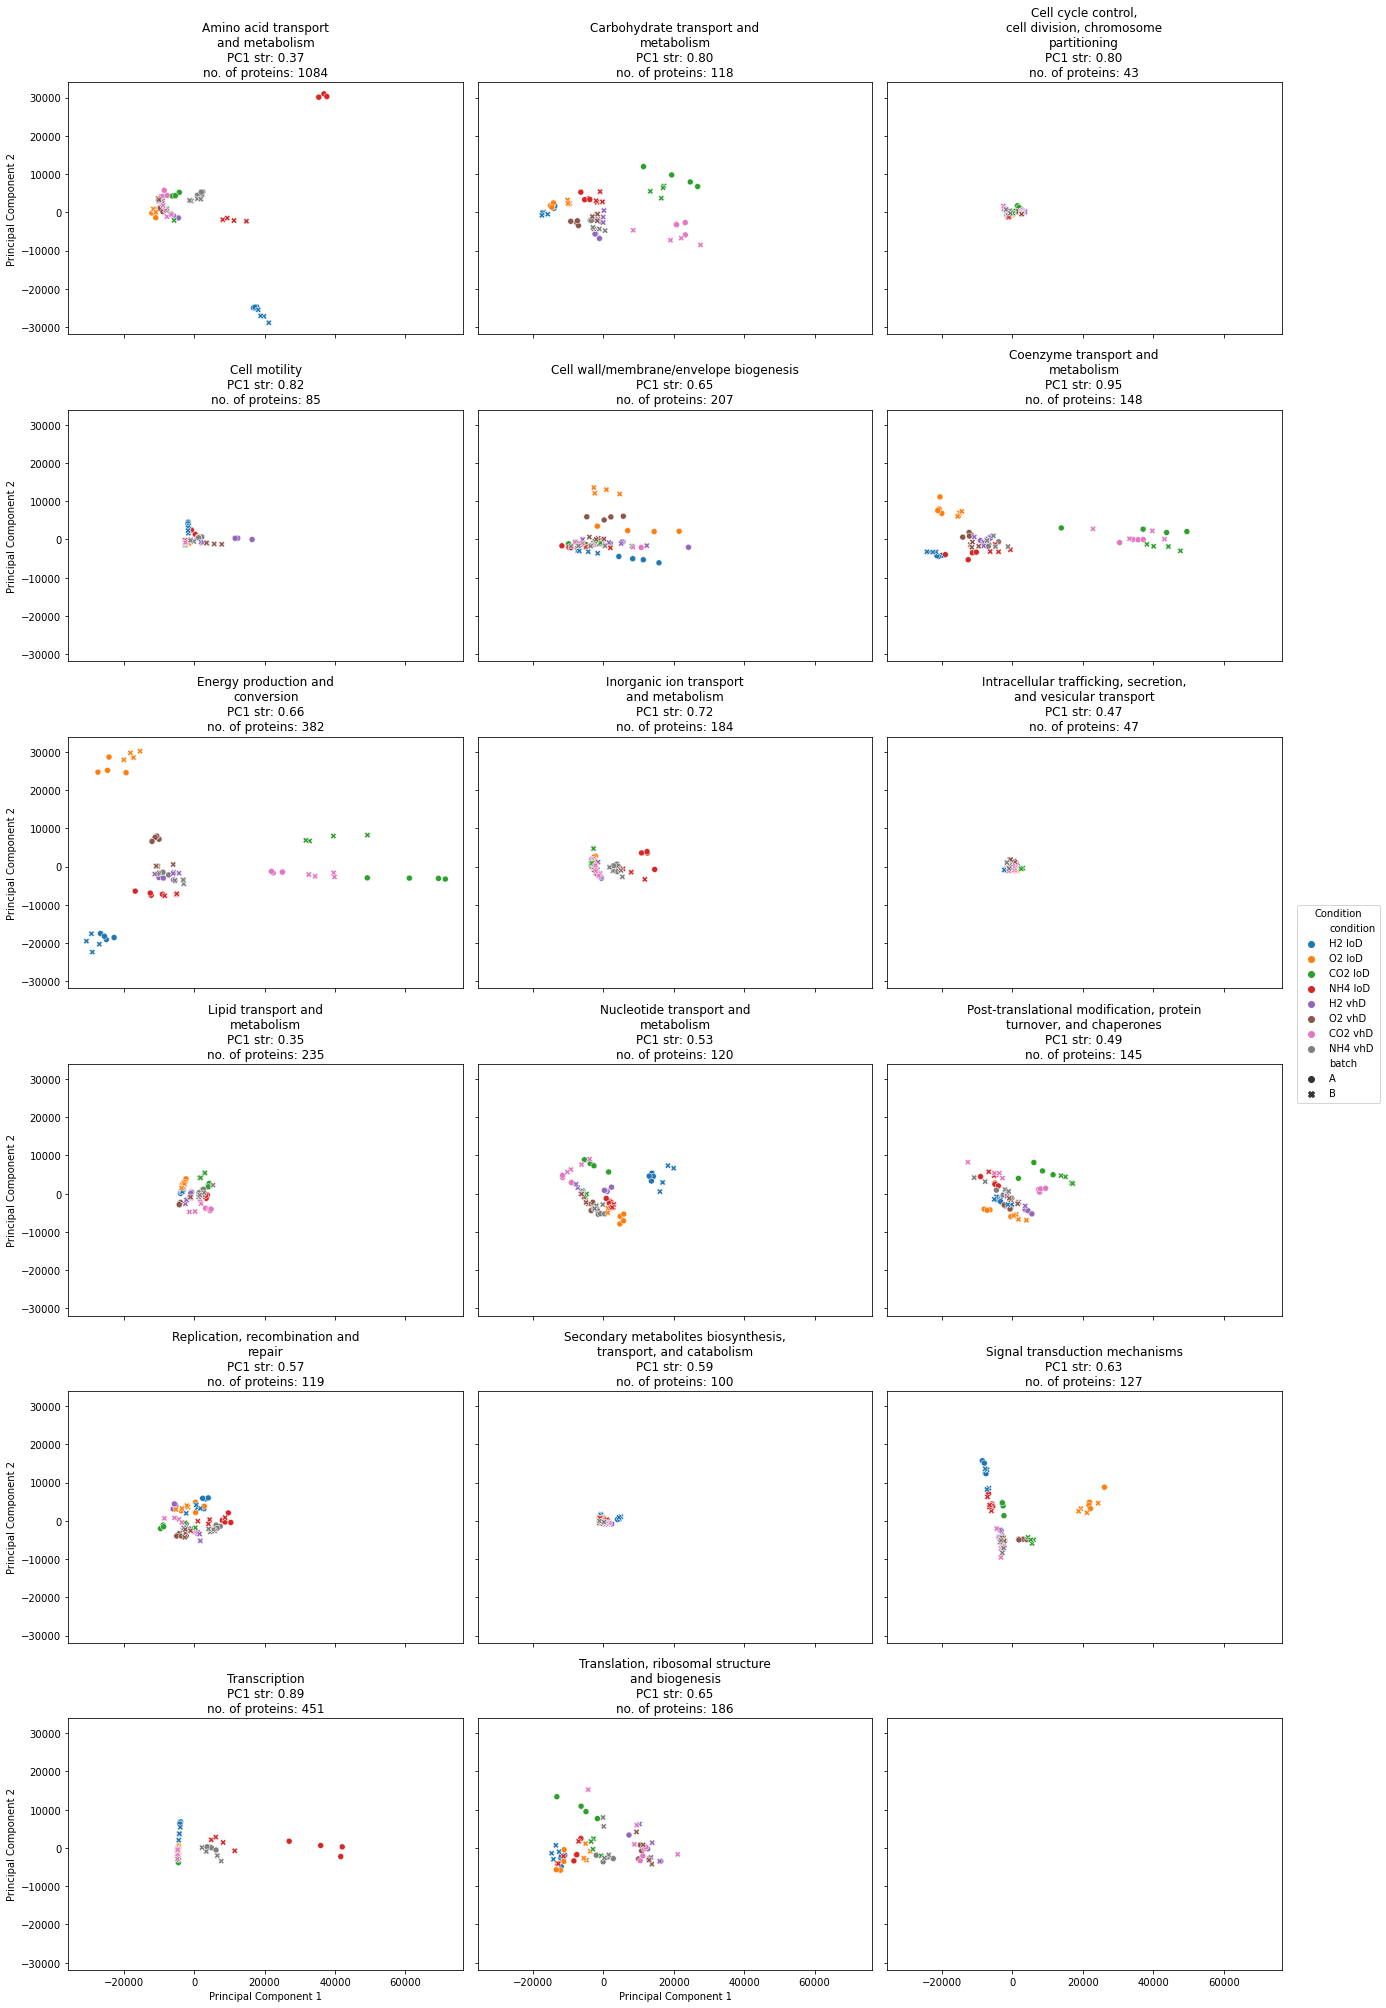

In [6]:
#lets set up how many plots we're going to have and an appropriate figure size. (I did this by trial and error)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 28), sharex=True, sharey=True)
axes = axes.flatten()

#axim is the axis number the plot will be assigned and we add one at the start of the cycle so lets start on -1
axim = -1
legend_handles = []
legend_labels = []
#create an empty dataframe to concat the small groups (pathways of <10 proteins) to.
small_groups_df = pd.DataFrame()

#here we group the data based on their labelled broad categories of metabolic function. This can be adjusted to group on other factors later, eg chromosome/plasmid of origin.
grouped = df_wcats.groupby('COG process')

for i, group in grouped:
    group = group.drop('COG process', axis = 1)
    
    number_samples = group.count()
    number_samples = number_samples.nlargest(1)

#we are here only looking at PCAs for metabolic functions that have more than 10 associated proteins. The others can be grouped seperately
#we will cycle through each separate group and plot them individually
    if number_samples[0] > 10:
        no_proteins = number_samples[0]
        
    #now transform the individual group data back lets call it trans
        
        #group = StandardScaler().fit_transform(group) # this scales it by protein BUT NOT NECESSARILY NEEDED
        trans = group.T
        
    #now lets make sure it's scaled properly before the PCA 
    #NB this means each group is scaled individually - AGAIN NOT USED IN THE END
        
        #trans = StandardScaler().fit_transform(trans)
        
    #add 1 to axis number so next plot is assigned a new plot
       
        axim = axim +1
        
    #this trans data has no labels as we needed to scale it so lets re-add the labels from our "df_trimmed" dataframe
        indexNamesArr = df_trimmed.index.values
        listOfRowIndexLabels = list(indexNamesArr)
        pca = PCA(n_components=2)
    
        principalComponents = pca.fit_transform(trans)
    

        principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'], index = listOfRowIndexLabels)
                
    #lets get reactor run labels so we can label our data points based on their condition
    #first we add a new variable to the df "reactor run" its going to be the number associated with the sumple
        principalDf['Reactor_run'] = principalDf.index
        principalDf['Reactor_run']=principalDf['Reactor_run'].map(lambda x: x.rstrip('aAbBcCdD'))
        principalDf['Reactor_run']=principalDf['Reactor_run'].astype(int)
        
    #now we interpret that run number as a reactor condition. this obviously has to be manually changed when adding new runs to this analysis
    #in this case we have the full data set followed by the two pilot datasets all at the middle dilution rate
        principalDf['condition'] = principalDf['Reactor_run'].map({
            1: "H2 loD",
            2: "O2 loD",
            3: "CO2 loD",
            4: "NH4 loD",
            5: "H2 vhD",
            6: "O2 vhD",
            7: "CO2 vhD",
            8: "NH4 vhD",
            9:"H2 loD",
            10: "O2 loD",
            11: "CO2 loD",
            12: "NH4 loD",
            13: "H2 vhD",
            14: "O2 vhD",
            15: "CO2 vhD",
            16: "NH4 vhD",
            17: "H2 midD",
            18: "O2 midD",
            19: "H2 midD",
            20: "O2 midD",
            21: "H2 midD",
            22: "O2 midD",
            23: "H2 midD",
            24: "H2 midD",
            25: "O2 midD",
            26: "O2 midD",
            27: "H2 midD"
    
    
        })
    #and now a batch indicating which biological replicate the sample belopngs to
        principalDf['batch'] = principalDf['Reactor_run'].map({
            1: "A",
            2: "A",
            3: "A",
            4: "A",
            5: "A",
            6: "A",
            7: "A",
            8: "A",
            9: "B",
            10: "B",
            11: "B",
            12: "B",
            13: "B",
            14: "B",
            15: "B",
            16: "B",
            17: "pilot",
            18: "A",
            19: "A",
            20: "B",
            21: "B",
            22: "C",
            23: "C",
            24: "D",
            25: "D",
            26: "E",
            27: "E"
    
    
    
        })
        
#I've changed the palette here to accomodate the number of sample conditions 
#this number of conditions is hard to represent in a colourblind friendly format (shapes are already dedicated to replicates)
        custom_palette = sns.color_palette('tab10', n_colors=len(principalDf['condition'].unique()))
        scatter = sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', ax=axes[axim], hue='condition', style='batch', palette=custom_palette)
        
    #this variance value, included in the fig titles, shows the strength of PC1, 
    #it effectively shows how strongly correlated the variance in the data is
        variance=(pca.explained_variance_ratio_)[0]
        
    #this splits the title text after every 3rd word to avoid overlap. i here is the metab_func
        
        title_words = i.split()
        title_lines = [' '.join(title_words[i:i+3]) for i in range(0, len(title_words), 3)]
        axes[axim].set_title(('\n'.join(title_lines))+'\n'+"PC1 str: "+(str(variance))[0:4]+'\n'+"no. of proteins: "+(str(no_proteins)))
        
        axes[axim].set_xlabel('Principal Component 1')
        axes[axim].set_ylabel('Principal Component 2')
        
    #now lets export a file showing the weightings of these proteins in the individual PCAs
        
        #stuff=(pca.components_[0])
        #studf=pd.DataFrame(stuff)
    #we ideally first want to concat this with the protein labels so we know what they are
        
        #studf.to_csv("protw8.csv")
        
        
    #if statement is negative meaning the category had less than 10 proteins in it, so we want a "catch all" group for them
    else:
        small_groups_df = pd.concat([small_groups_df, group])


#in this case there is no catch all group as all proteins are accounted for in groups of more than 10 proteins 
#so lets comment this section out

"""
#now all the groups have been cycled through we need to plot the catch all group

no_proteins = small_groups_df.count()
no_proteins = no_proteins.nlargest(1)

trans = small_groups_df.T
trans = StandardScaler().fit_transform(trans)
axim = axim +1

indexNamesArr = df_trimmed.index.values
listOfRowIndexLabels = list(indexNamesArr)
pca = PCA(n_components=2)
    
principalComponents = pca.fit_transform(trans)
    

principalDf = pd.DataFrame(data = principalComponents
    , columns = ['principal component 1', 'principal component 2'], index = listOfRowIndexLabels)
                
        #lets get reactor run labels so we can label our data points based on their condition
        #first we add a new variable to the df "reactor run" its going to be the number associated with the sumple
principalDf['Reactor_run'] = principalDf.index
principalDf['Reactor_run']=principalDf['Reactor_run'].map(lambda x: x.rstrip('aAbBcCdD'))
principalDf['Reactor_run']=principalDf['Reactor_run'].astype(int)
        
        #now we interpret that run number as a reactor condition. this obviously has to be manually changed when adding new runs to this analysis
principalDf['condition'] = principalDf['Reactor_run'].map({
    1: "H2 loD",
    2: "O2 loD",
    3: "CO2 loD",
    4: "NH4 loD",
    5: "H2 vhD",
    6: "O2 vhD",
    7: "CO2 vhD",
    8: "NH4 vhD",
    9:"H2 loD",
    10: "O2 loD",
    11: "CO2 loD",
    12: "NH4 loD",
    13: "H2 vhD",
    14: "O2 vhD",
    15: "CO2 vhD",
    16: "NH4 vhD",
    17: "pilot repeat",
    18: "O2 midD",
    19: "H2 midD",
    20: "O2 midD",
    21: "H2 midD",
    22: "O2 midD",
    23: "H2 midD",
    24: "H2 midD",
    25: "O2 midD",
    26: "O2 midD",
    27: "H2 midD"
    
    
})
        #and now a batch indicating which biological replicate the sample belopngs to
principalDf['batch'] = principalDf['Reactor_run'].map({
    1: "A",
    2: "A",
    3: "A",
    4: "A",
    5: "A",
    6: "A",
    7: "A",
    8: "A",
    9:"B",
    10: "B",
    11: "B",
    12: "B",
    13: "B",
    14: "B",
    15: "B",
    16: "B",
    17: "pilot",
    18: "A",
    19: "A",
    20: "B",
    21: "B",
    22: "C",
    23: "C",
    24: "D",
    25: "D",
    26: "E",
    27: "E"  
})
        

custom_palette = sns.color_palette('Set1', n_colors=len(principalDf['condition'].unique()))
scatter = sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', ax=axes[axim], hue='condition', style='batch', palette=custom_palette)
        
        #this variance value, included in the fig titles, shows the strength of PC1, 
        #it effectively shows how strongly correlated the variance in the data is
variance=(pca.explained_variance_ratio_)[0]
        
        #this splits the title text after every 3rd word to avoid overlap. i here is the metab_func
        

axes[axim].set_title(("catch all")+'\n'+"PC1 str: "+(str(variance))[0:4]+'\n'+"no. of proteins: "+(str(no_proteins)))
        
axes[axim].set_xlabel('Principal Component 1')
axes[axim].set_ylabel('Principal Component 2')
            
"""    
    
    
#create an overall legend based only on last processed subgroup
handles, labels = scatter.get_legend_handles_labels()        
legend_handles.extend(handles)
legend_labels.extend(labels)        
fig.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Condition')

#hide individual subplot legends so we only have one overall legend
for ax in axes:
    ax.legend().set_visible(False)

#increasing the headspace to avoid overlap again
plt.subplots_adjust(hspace=0.9) 
plt.savefig('output_figure.png', bbox_inches='tight')

plt.tight_layout()
plt.show()     


In [123]:
no_proteins
#export individual protein weightings
stuff=(pca.components_[0])
studf=pd.DataFrame(stuff)
studf.to_csv("protw8.csv")

In [7]:

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'], index = listOfRowIndexLabels)

finalDf=principalDf

#lets get reactor run labels so we can group our data points
finalDf['Reactor_run'] = finalDf.index

finalDf['Reactor_run']=finalDf['Reactor_run'].map(lambda x: x.rstrip('aAbBcCdD'))
finalDf['Reactor_run']=finalDf['Reactor_run'].astype(int)
finalDf['Condition'] = finalDf['Reactor_run'].map({
    1: "H2 Low Dilution Rate",
    2: "O2 Low Dilution Rate",
    3: "CO2 Low Dilution Rate",
    4: "NH4 Low Dilution Rate",
    5: "H2 High Dilution Rate",
    6: "O2 High Dilution Rate",
    7: "CO2 High Dilution Rate",
    8: "NH4 High Dilution Rate",
    9:"H2 Low Dilution Rate",
    10: "O2 Low Dilution Rate",
    11: "CO2 Low Dilution Rate",
    12: "NH4 Low Dilution Rate",
    13: "H2 High Dilution Rate",
    14: "O2 High Dilution Rate",
    15: "CO2 High Dilution Rate",
    16: "NH4 High Dilution Rate",
    17: "pilot"
    
    
    
})
finalDf['Reactor Batch'] = finalDf['Reactor_run'].map({
    1: "A",
    2: "A",
    3: "A",
    4: "A",
    5: "A",
    6: "A",
    7: "A",
    8: "A",
    9:"B",
    10: "B",
    11: "B",
    12: "B",
    13: "B",
    14: "B",
    15: "B",
    16: "B",
    17: "pilot"
    
    
    
})
#unique_runs=list(Reactor_run)

finalDf



,principal component 1,principal component 2,principal component 3,principal component 4,Reactor_run,Condition,Reactor Batch
1A,-42671.554866,22391.326678,-33830.044941,-10673.209711,1,H2 Low Dilution Rate,A
1B,-45014.228350,22015.936932,-33280.167982,-10887.058184,1,H2 Low Dilution Rate,A
1C,-46316.317194,19391.027062,-31380.909934,-12230.394345,1,H2 Low Dilution Rate,A
1D,-44869.090330,22173.168993,-32241.393440,-9674.599243,1,H2 Low Dilution Rate,A
2A,-36548.912897,-37578.181694,-8158.017693,26899.112542,2,O2 Low Dilution Rate,A
...,...,...,...,...,...,...,...
15D,66615.469338,-1674.443594,376.293771,-15420.650693,15,CO2 High Dilution Rate,B
16A,-5476.035669,3504.526695,14396.954521,-6804.960097,16,NH4 High Dilution Rate,B
16B,-8330.265538,7103.062898,16209.457318,-3433.392890,16,NH4 High Dilution Rate,B
16C,-5060.792969,9926.365498,16341.124188,-3146.811105,16,NH4 High Dilution Rate,B


In [8]:
finalDf=principalDf

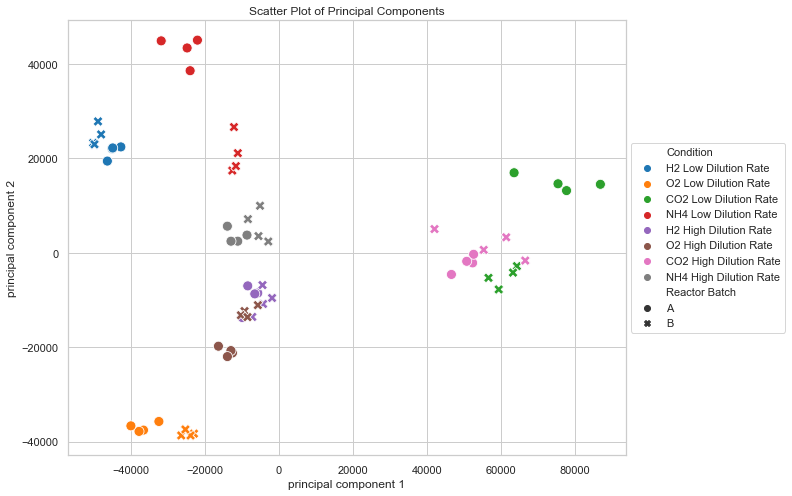

In [9]:

# Set the style for seaborn
sns.set(style="whitegrid")

#custom_palette = sns.color_palette('Set1', n_colors=len(finalDf['condition'].unique()))
#custom_palette = sns.color_palette('tab10', n_colors=len(finalDf['condition'].unique()))
# Create a scatter plot with different colors for each Reactor_run
plt.figure(figsize=(10, 8))
sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue='Condition', style='Reactor Batch', palette=custom_palette, s=100)
# Move the legend to the right outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Show the plot
plt.title('Scatter Plot of Principal Components')
plt.savefig('66samplePCA.png', bbox_inches='tight')

plt.show()

In [10]:
pca.explained_variance_ratio_

array([0.47637506, 0.15131839, 0.11190126, 0.08812178])